In [45]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from scipy.linalg import lu
from numpy.linalg import svd

# Sprawozdanie 6 

# Zad 1 

In [46]:
def gauss_jordan(A, b):
    n = A.shape[0]
    #concat
    M = np.hstack((A, b))
    
    for i in range(n):
        max_r = i
        for k in range (i+1, n):
            if abs(M[k][i])>abs(M[max_r][i]):
                max_r = k  
                
        #nalezy zamienic       
        if max_r != i:
            M[[i, max_r]] = M[[max_r, i]]
       
        for j in range(0, n):
            if j != i:
                ratio = M[j][i] / M[i][i]
                M[j] -= ratio * M[i]
        
    #wszystkie wiersze, ale bez ostatniej kolumny
    A = M[:,:-1]
    #wszystkie wiersze ostatniej kolumny
    b = M[:,-1]
    
    #dziele przez przekatna
    x = [0]*n
    for i in range(n):
        x[i] = b[i]/A[i,i]
        
    return x

In [47]:
size = [500, 550, 600, 650, 900]
for s in size:
    A = np.random.rand(s, s)
    b = np.random.rand(s, 1)
    starttime = timeit.default_timer()
    np.linalg.solve(A,b).flatten()
    time1 = timeit.default_timer()-starttime
    print("The time is for linalg.solve: ", time1)
    starttime = timeit.default_timer()
    gauss_jordan(A, b)
    time2 = timeit.default_timer()- starttime
    print("The time is for gauss_jordan: ", time2)
    print(f"Difference: {abs(time1-time2)} n: {s} \n")

The time is for linalg.solve:  0.005698799999663606
The time is for gauss_jordan:  1.6088354000003164
Difference: 1.6031366000006528 n: 500 

The time is for linalg.solve:  0.005602200000794255
The time is for gauss_jordan:  1.8852303999992728
Difference: 1.8796281999984785 n: 550 

The time is for linalg.solve:  0.004690899999332032
The time is for gauss_jordan:  2.417201700000078
Difference: 2.412510800000746 n: 600 

The time is for linalg.solve:  0.005840199999511242
The time is for gauss_jordan:  2.7579613999987487
Difference: 2.7521211999992374 n: 650 

The time is for linalg.solve:  0.012986199999431847
The time is for gauss_jordan:  6.253055299999687
Difference: 6.240069100000255 n: 900 



Wada - ma większą złożoność, jest wolniejsza. Zaleta - intuicyjna, ma zastosowanie przy wyliczaniu macierzy odwrotnej.

# Zad 2 

2.1

Zadanie drugie postanowiłam zrobić, korzystając z funkcji napisanej w zadaniu 1. Wykorzystuje partial pivoting, tak więc istotna jest macierz permutacji P, którą muszę uwzględnić przy rozwiązywaniu układu równań. Najpierw kopiuje macierz A do macierzy M, ponieważ przeprowadzam operacje, które tą macierz zmieniają. Robię te same czynności co w zadaniu 1. a następnie odpowiednio uzupełniam macierze L i U. 

In [48]:
def PLU_factor(A):
    print("Macierz do faktoryzacji: \n ")
    print(A)
    print("")
    M = A.copy()
    n = M.shape[0]
    P_temp = [x for x in range(n)]
    scales = [0]*n
    
    #wyliczamy skale wierszy (maksymalny element w kazdym)
    for i in range(n):
        scales[i] = max(M[i])

    for i in range(n):
        max_r = i
        #zamiast porownywac elementy, porownujemy ich iloraz ze skala odpowiadajacego mu wiersza
        for k in range (i+1, n):
            if abs(M[k][i]/scales[i])>abs(M[max_r][i]/scales[i]):
                max_r = k 
                
        #nalezy zamienic       
        if max_r != i:
            M[[i, max_r]] = M[[max_r, i]]
            P_temp[i], P_temp[max_r] = P_temp[max_r], P_temp[i]
            #jesli zamieniamy wiersze to zamieniamy tez skale
            scales[i], scales[max_r] = scales[max_r],scales[i]

        for j in range(i+1,n):
            M[j][i] = M[j][i]/M[i][i]
            for m in range(i+1, n):
                M[j][m] = M[j][m] - M[j][i]*M[i][m]   
           
    P = np.zeros((n, n))    
    for i in range(n):
        k = P_temp[i] 
        for j in range(n):
            if (j==k):
                P[i][j] = 1
                
    U = np.zeros((n,n))
    for i in range(n):
        for j in range(i, n):
            U[i][j] = M[i][j]
    
    L = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1):
            if i==j:
                L[i][j] = 1
            else:
                L[i][j] = M[i][j]
                
    #mnozenie LU
    X = np.matmul(L, U)
    print("Wynik mnożenia LU:\n ")
    print(X)
    print("")
    
    
    return P, L, U

In [50]:
A=np.random.rand(3,3)
print(PLU_factor(A))
print(" ")
print("Macierz przy użyciu funkcji scipy.linalg.lu: \n")
print(lu(A))

Macierz do faktoryzacji: 
 
[[0.12804662 0.19808423 0.31162015]
 [0.7506873  0.54229498 0.76251711]
 [0.14836415 0.74221401 0.49960952]]

Wynik mnożenia LU:
 
[[0.7506873  0.54229498 0.76251711]
 [0.14836415 0.74221401 0.49960952]
 [0.12804662 0.19808423 0.31162015]]

(array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]]), array([[1.        , 0.        , 0.        ],
       [0.19763775, 1.        , 0.        ],
       [0.17057251, 0.16626397, 1.        ]]), array([[0.7506873 , 0.54229498, 0.76251711],
       [0.        , 0.63503605, 0.34890735],
       [0.        , 0.        , 0.12354497]]))
 
Macierz przy użyciu funkcji scipy.linalg.lu: 

(array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]]), array([[1.        , 0.        , 0.        ],
       [0.19763775, 1.        , 0.        ],
       [0.17057251, 0.16626397, 1.        ]]), array([[0.7506873 , 0.54229498, 0.76251711],
       [0.        , 0.63503605, 0.34890735],
       [0.        , 0.        , 0.12354497]]))


Wyniki mojej funkcji i funkcji bibliotecznej co prawda różnią się, jednak macierz permutacji również jest inna i prawdopodobnie to jest przyczyną. Dodatkowo sprawdziłam, czy przeprowadzam tą faktoryzacje poprawnie, mnożąc macierze L i U - uzyskałam taką samą macierz, jak macierz A, tylko z pozamienianymi wierszami (w sposób odpowiadający macierzy P).

2.2

Zgodnie z tym, co wcześniej wspomniałam - rozwiązując układ, muszę pamiętać o macierzy P. Układ równań jest w postaci P^-1LUx = b. Jest to równoważne z następującym układem LUx = Pb i w tej postaci będę go rozwiązywać. 

Przy rozwiązywaniu układu wykorzystuje dwie operacje. Najpierw rozwiązuje Ly = b metodą podstawień w przód a potem metodą podstawień wstecz rozwiązuje analogicznie układ Ux = y. W ten sposób otrzymuje wektor x.  

In [51]:
def forward_substitution(L, b):
    n = L.shape[0]
    y = np.zeros((n,1))
    
    for i in range(n):
        y[i] = b[i]
        for j in range (0, i):
            y[i] -= y[j] * L[i][j]

    return y
    

In [52]:
def back_substitution(U, y):
    n = U.shape[0]
    x = np.zeros_like(y, dtype=np.double)
    
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(n - 1, i, -1):
            x[i] -= x[j] * U[i][j]
        x[i] /= U[i][i]
       
    return x

In [58]:
def plu_solve(A, b):
    P, L, U = PLU_factor(A)
    y = forward_substitution(L, np.matmul(P, b))
    print("Wynik przy użyciu mojej funkcji: \n")
    return back_substitution(U, y)

In [62]:
A = np.array([[ 1.,  3., -1.],
       [ 3.,  8.,  1.],
       [-1.,  1.,  4.]])

b = np.array([[1.],[2.],[3.]])

print(plu_solve(A, b))
print(" ")
print("Wynik linalg.solve:\n ")
print(np.linalg.solve(A, b))

Macierz do faktoryzacji: 
 
[[ 1.  3. -1.]
 [ 3.  8.  1.]
 [-1.  1.  4.]]

Wynik mnożenia LU:
 
[[ 3.  8.  1.]
 [-1.  1.  4.]
 [ 1.  3. -1.]]

Wynik przy użyciu mojej funkcji: 

[[-2.00000000e+00]
 [ 1.00000000e+00]
 [ 6.42760698e-17]]
 
Wynik linalg.solve:
 
[[-2.00000000e+00]
 [ 1.00000000e+00]
 [ 6.45195398e-17]]


In [64]:
A = np.random.rand(3,3)
b = np.random.rand(3,1)

In [66]:
print(plu_solve(A,b))
print('\n')
print("Wynik linalg.solve: \n")
print(np.linalg.solve(A,b))

Macierz do faktoryzacji: 
 
[[0.31302774 0.0918091  0.73504304]
 [0.44419934 0.33780139 0.38798416]
 [0.47095346 0.41563739 0.21735326]]

Wynik mnożenia LU:
 
[[0.47095346 0.41563739 0.21735326]
 [0.31302774 0.0918091  0.73504304]
 [0.44419934 0.33780139 0.38798416]]

Wynik przy użyciu mojej funkcji: 

[[ 19.83458776]
 [-17.1148427 ]
 [ -5.73997257]]


Wynik linalg.solve: 

[[ 19.83458776]
 [-17.1148427 ]
 [ -5.73997257]]


# Zad 3 

<Figure size 432x288 with 0 Axes>

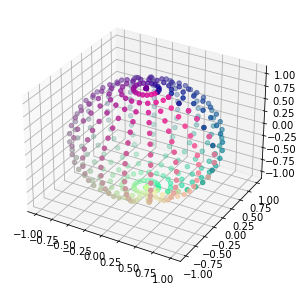

In [30]:
from itertools import product
from mpl_toolkits.mplot3d import Axes3D

def draw_sphere():
    s_values = np.linspace(0, 2*np.pi, 20)
    t_values = np.linspace(0, np.pi, 20)
    x_points = []
    y_points = []
    z_points = []
    colors = []
    f_x = lambda s, t: np.cos(s)*np.sin(t)
    f_y = lambda s, t : np.sin(s)*np.sin(t)
    f_z = lambda s, t: np.cos(t)
    for s, t in product(s_values, t_values):
        x_points.append(f_x(s,t))
        y_points.append(f_y(s,t))
        z_points.append(f_z(s,t))
        colors.append([s/(2*np.pi), t/np.pi, 0.6])
    fig = plt.figure()
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(x_points, y_points, z_points, c = colors)
    

draw_sphere()

In [31]:
def get_sphere_points(): 
    s_values = np.linspace(0, 2*np.pi, 20)
    t_values = np.linspace(0, np.pi, 20)
    s_points = []
    f_x = lambda s, t: np.cos(s)*np.sin(t)
    f_y = lambda s, t : np.sin(s)*np.sin(t)
    f_z = lambda s, t: np.cos(t)
    for s, t in product(s_values, t_values):
        s_points.append(np.array([f_x(s,t), f_y(s,t), f_z(s,t)]))
    return s_points #tablice po 3 elementy

In [32]:
A1 = np.matrix(np.random.rand(3,3))
A2 = np.matrix(np.random.rand(3,3))
A3 = np.matrix(np.random.rand(3,3))

<Figure size 432x288 with 0 Axes>

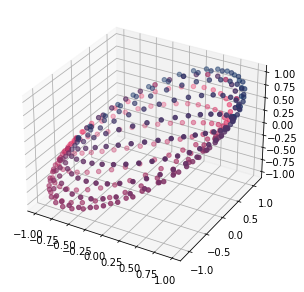

<Figure size 432x288 with 0 Axes>

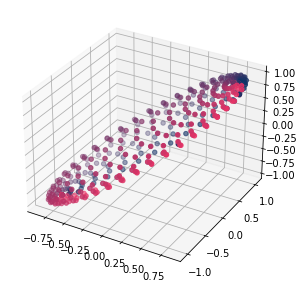

<Figure size 432x288 with 0 Axes>

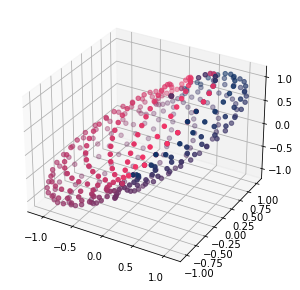

In [33]:
def transformation(matrix, sphere_points):
    new_points = []
    for points in sphere_points: #kazdy punkt z 3 wspolrzednych mnoze
        p =np.dot(matrix, np.matrix(points).transpose())
        new_points.append(p)
    return new_points

def ellipsoid(A):
    x_points = []
    y_points = []
    z_points = []
    colors = []
    sphere_points = get_sphere_points()
    A_el = transformation(A, sphere_points)
    for i in range(len(A_el)):
        x_points.append(A_el[i][0])
        y_points.append(A_el[i][1])
        z_points.append(A_el[i][2])
        colors.append([i/len(A_el),0.2,0.4])
    fig = plt.figure()
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(x_points, y_points, z_points, c=colors)

    
ellipsoid(A1)
ellipsoid(A2)
ellipsoid(A3)

3.3 Aby lepiej zrozumieć to zadanie korzystałam z https://www.cs.cornell.edu/courses/cs322/2008sp/stuff/TrefethenBau_Lec4_SVD.pdf. 

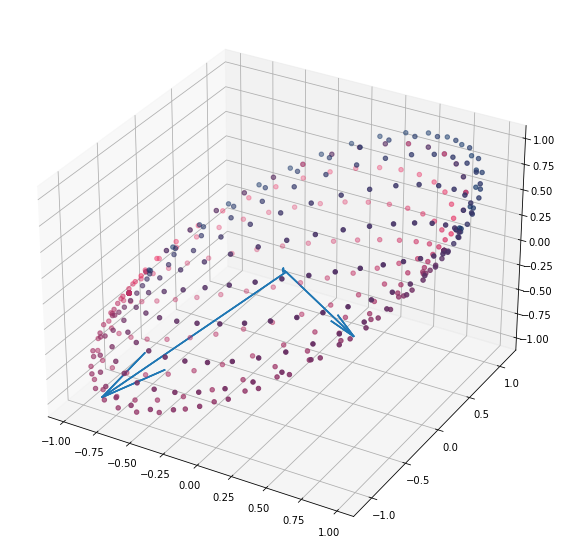

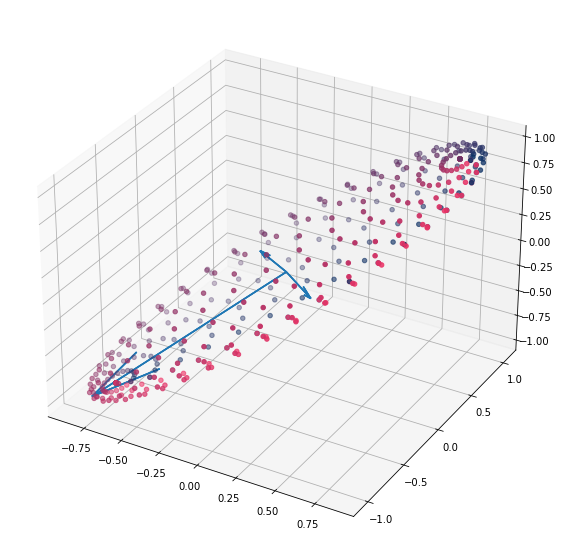

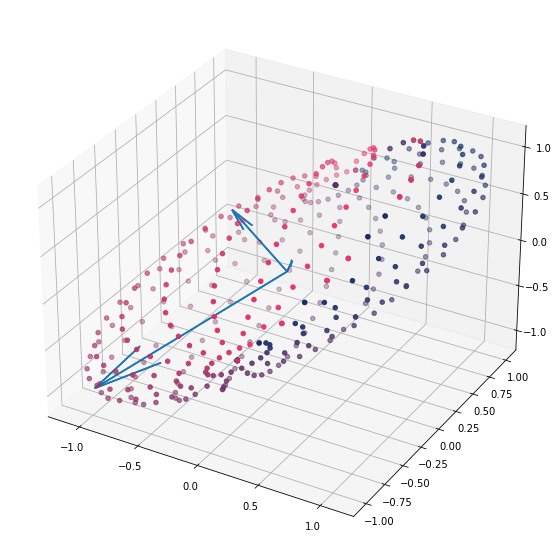

In [34]:
def draw_with_semiaxes(A):
    svd_val = svd(A)
    U = svd_val[0] #left singular vectors - glowne osie
    D = svd_val[1] #lenghts 
    VT = svd_val[2] #right singular vectors - preimages of semiaxes
    axes1 = []
    axes= []
    ax = [[0 for i in range(3)] for j in range(3)]

    for i in range(len(D)):
        for k in range(3):
            ax[i][k] = D[i]*U[k, i]                
        axes+=ax
        
    #przepisana funkcja z rysowania elipsoidy
    x_points = []
    y_points = []
    z_points = []
    colors = []
    sphere_points = get_sphere_points()
    A_el = transformation(A, sphere_points)
    for i in range(len(A_el)):
        x_points.append(A_el[i] [0])
        y_points.append(A_el[i][1])
        z_points.append(A_el[i][2])
        colors.append([i/len(A_el),0.2,0.4])
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection = '3d')
    
    #dodaje półosie 
    for s_ax in axes:
        ax.quiver(0, 0, 0, s_ax[0], s_ax[1], s_ax[2])
    ax.scatter(x_points, y_points, z_points, c=colors)
    
draw_with_semiaxes(A1)
draw_with_semiaxes(A2)
draw_with_semiaxes(A3)    

3.4 

In [37]:
Z=np.random.rand(3,3)

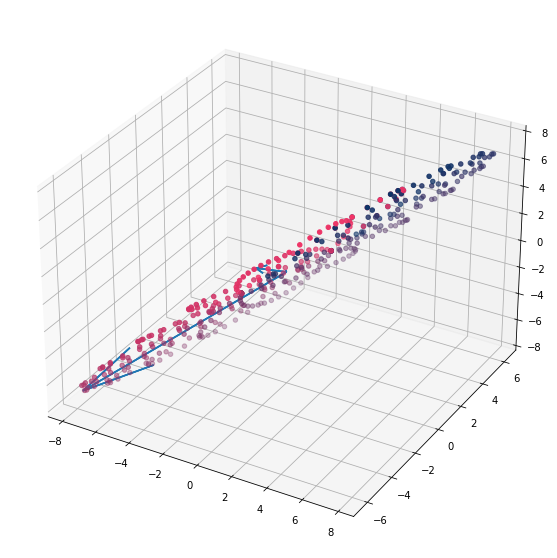

In [42]:
U,D,T = svd(Z)
D[0] = 12
D[1] = 3
D[2] = 0.1

def create_D(D):
    D1 = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            if i==j:
                D1[i][j] = D[i]
    return D1

new_D = create_D(D)

X = np.matmul(U,new_D)
Z1 = np.matmul(X,T)

        
draw_with_semiaxes(Z1)  


Elipsoida jest bardzo spłaszczona. Oprócz zmiany największej i najmniejszej wartości (na 12 i 0.1) zmieniłam jeszcze środkową na taką wartość "pomiędzy" tymi dwoma. Macierz wartości osobliwych ma wpływ na długość osi wyznaczanych przez macierz U, co widać bardzo dobrze na wykresie powyżej. Przez tak duży stosunek wartości osobliwych, jedna oś jest wyjątkowo długa, rozciąga figurę, spłaszczając ją.

3.5 W tym zadaniu duży problem sprawiło mi odpowiednie wymnożenie poszczególnych macierzy. Kiedy robiłam po kolei, wynik końcowy nie był taki sam jak przy uzyciu funkcji ellipsoid. Wersja poniżej polega na wymnożeniu najpierw macierzy SVD a następnie przeprowadzam transformację kuli. 
Transformacja sfery w elipse zachodzi w następujący sposób: najpierw sfera jest rotowana (SVT), następnie "rozciągana" zgodnie z wartościami osobliwymi a na końcu ponownie rotowana zgodnie z wektorami w macierzy U, które wyznaczają jej główne osie.

In [143]:
M = np.random.rand(3,3)

<Figure size 432x288 with 0 Axes>

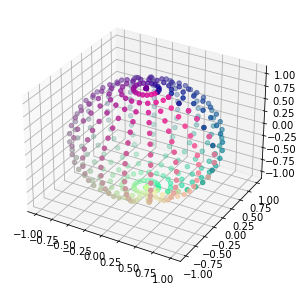

<Figure size 432x288 with 0 Axes>

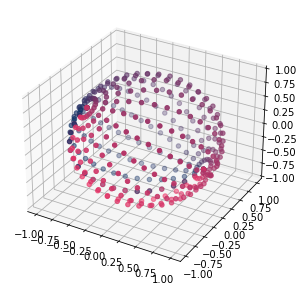

<Figure size 432x288 with 0 Axes>

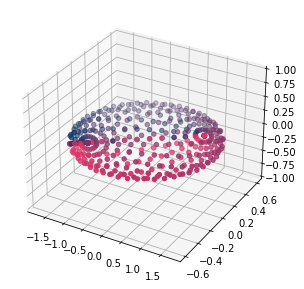

<Figure size 432x288 with 0 Axes>

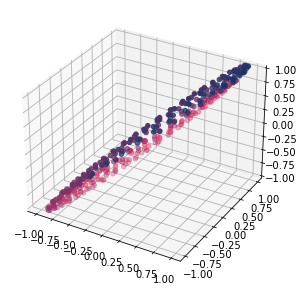

<Figure size 432x288 with 0 Axes>

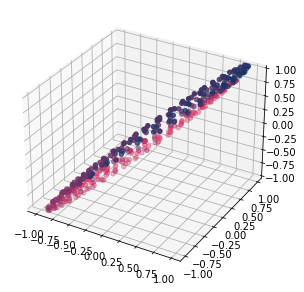

In [225]:
def visual(M, num):
    x_points = []
    y_points = []
    z_points = []
    colors = []
    sphere_points = get_sphere_points()
    U, D, VT = svd(M)
    D1 = create_D(D)
    if num==1:
        X = transformation(VT, sphere_points)
    if num==2:
        Z = np.matmul(D1,VT)
        X = transformation(Z, sphere_points)
    if num == 3:
        Z = np.matmul(U, D1)
        Y = np.matmul(Z, VT)
        X = transformation(Y, sphere_points)

    for i in range(len(X)):
        x_points.append(X[i][0])
        y_points.append(X[i][1])
        z_points.append(X[i][2])
        colors.append([i/len(X),0.2,0.4])
    fig = plt.figure()
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(x_points, y_points, z_points, c=colors)
    ax.set_zlim(-1,1)


draw_sphere()
visual(M, 1)
visual(M,2)
visual(M,3)
ellipsoid(M)

# Zad 4

4.1 W zadaniu tym przy obliczaniu condition number w przypadku losowo wygenerowanych funkcji korzystam z funkcji np.linalg.cond. 


In [142]:
A = np.array([[0.835, 0.667],
    [0.333, 0.266 ]])
B = np.array([0.168, 0.067])
print(np.linalg.solve(A,B))

[ 1. -1.]


In [143]:
A = np.array([[0.835, 0.667],
    [0.333, 0.266 ]])
B = np.array([0.168, 0.066])
print(np.linalg.solve(A,B))

[-665.99999998  833.99999998]


Wyniki, mimo że zmiana była niewielka, są diametralnie różne.

In [160]:
A = [[0.835, 0.667],
    [0.333, 0.266 ]]
B = [[0.168, 0.067]]

D = svd(A)[1]
print("Stosunek wartości największej do najmniejszej: ")
#ułożone malejąco
print(D[0]/D[1])

print("Wyliczony przy użyciu funkcji bibliotecznej: ")
print(np.linalg.cond(A))

A1 = np.random.rand(2,2)
A2 = np.random.rand(2,2)

print("Condition number - dla innych, losowo wygenerowanych macierzy: ")
print(np.linalg.cond(A1))
print(np.linalg.cond(A2))


Stosunek wartości największej do najmniejszej: 
1323758.9999810576
Wyliczony przy użyciu funkcji bibliotecznej: 
1323758.9999810571
Condition number - dla innych, losowo wygenerowanych macierzy: 
3.7870896334800093
7.085196292952838


Widać dużą różnice między wartościami wyliczonymi dla macierzy z zadania a losowymi macierzami A1, A2. Condition number pierwszej macierzy jest o wiele większy. Przy takiej wartości układ uznajemy za źle uwarunkowany, wrażliwy na wszelkie zmiany elementów macierzy A lub b. 